# <font color = 'gray'>Thiago</font>

## <font color = 'gray'>Análise de Série Temporal da Inflação</font>

##  - Vou utilizar Modelagem Preditiva, apesar de ser necessário utilizar a Análise Estatística para entender relações e comportamentos

## - Vou utilizar IA, apesar de modelos simples poderem ser resolvidos com Machine Learning

## - Vou utilizar técnica de Séries Temporais para prever uma única classe.

## - Vou entregar em formato de Tabela

In [ ]:
# Instalando TensorFlow

# !pip install tensorflow

In [1]:
# Imports

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

2023-10-16 17:26:20.004387: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-16 17:26:20.006223: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-16 17:26:20.029413: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-16 17:26:20.029435: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-16 17:26:20.029452: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Thiago Gragnanello" --iversions

Author: Thiago Gragnanello

numpy     : 1.26.1
matplotlib: 3.5.2
tensorflow: 2.14.0
pandas    : 1.4.4



In [3]:
# Carrega os dados
df_dsa = pd.read_csv('dataset.csv')

In [4]:
# Define nossa série temporal

# O dataset já está organizado e na sequência correta. Se não estivesse, eu teria que organizar 

inflacao = df_dsa['inflacao'].values.reshape(-1, 1)

In [5]:
# Função para criar o dataset para o modelo LSTM com look_back
# O parâmetro look_back define o número de passos no tempo que o modelo usará para fazer cada previsão
def func_cria_dataset(data, look_back = 1):

    # Inicializa duas listas vazias, X e Y, que conterão as sequências de entrada e saída, respectivamente
    X, Y = [], []
    
    # Itera pelo conjunto de dados menos o valor de look_back. Isso é feito para evitar índices fora dos limites do array
    for i in range(len(data) - look_back):
        
        # Coleta uma sequência de dados de tamanho look_back começando no índice i
        a = data[i:(i + look_back), 0]
        
        # Adiciona a sequência à lista X
        X.append(a)
        
        # Adiciona o valor imediatamente após a sequência de look_back à lista Y. Esse será nosso valor de saída (target).
        Y.append(data[i + look_back, 0])
    
    # Converte X e Y para arrays numpy para compatibilidade com a maioria das bibliotecas de aprendizado de máquina
    return np.array(X), np.array(Y)

In [6]:
# Dividimos os dados em treinamento e teste (respeitando a ordem cronológica dos dados)
indice = int(len(inflacao) * 0.8)
dados_treino, dados_teste = inflacao[0:indice, :], inflacao[indice:len(inflacao), :]

# Quer dizer que começo no primeiro item e vou até o índice da linha e depois pego todas as colunas
# Depois pego tudo depois do índice 0.8


In [7]:
# Normaliza os dados (requerimento para redes neurais)
scaler = MinMaxScaler(feature_range = (0, 1))

In [8]:
# Treina e aplica o scaler em treino e somente aplica em teste

# Utilizo fit_transform em treino porque preciso TREINAR
# Utilizo somente o transform em teste porque já está treinado

dados_treino_norm = scaler.fit_transform(dados_treino)
dados_teste_norm = scaler.transform(dados_teste)

In [9]:
# Criamos os datasets para o modelo LSTM
look_back = 3
X_treino, y_treino = func_cria_dataset(dados_treino_norm, look_back)
X_teste, y_teste = func_cria_dataset(dados_teste_norm, look_back)

In [10]:
# Reshape dos dados para [samples, time steps, features]. Isso é um requerimento do modelo LSTM
X_treino = np.reshape(X_treino, (X_treino.shape[0], X_treino.shape[1], 1))
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [11]:
# Construindo o modelo LSTM
modelo = tf.keras.models.Sequential([tf.keras.layers.LSTM(50, input_shape = (look_back, 1)),
                                     tf.keras.layers.Dense(1)])

# look_back = (3, 1), seguindo exemplo
# o 1 no final é porque o modelo me entrega somente 1 previsão

2023-10-16 17:26:32.640514: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-16 17:26:32.640780: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:

# Compila o modelo
modelo.compile(optimizer = 'adam', loss = 'mean_squared_error')

# adam utiliza o backpropagation

In [13]:
# Treinamento do modelo
modelo.fit(X_treino, y_treino, epochs = 50, batch_size = 1, verbose = 1)

# Treino com 50 épocas e com 1 registro por vez

Epoch 1/50
40/40 [==============================] - 1s 1ms/step - loss: 0.1973
Epoch 2/50
40/40 [==============================] - 0s 998us/step - loss: 0.0647
Epoch 3/50
40/40 [==============================] - 0s 943us/step - loss: 0.0646
Epoch 4/50
40/40 [==============================] - 0s 900us/step - loss: 0.0646
Epoch 5/50
40/40 [==============================] - 0s 932us/step - loss: 0.0684
Epoch 6/50
40/40 [==============================] - 0s 901us/step - loss: 0.0619
Epoch 7/50
40/40 [==============================] - 0s 912us/step - loss: 0.0640
Epoch 8/50
40/40 [==============================] - 0s 920us/step - loss: 0.0601
Epoch 9/50
40/40 [==============================] - 0s 901us/step - loss: 0.0606
Epoch 10/50
40/40 [==============================] - 0s 938us/step - loss: 0.0637
Epoch 11/50
40/40 [==============================] - 0s 895us/step - loss: 0.0624
Epoch 12/50
40/40 [==============================] - 0s 923us/step - loss: 0.0628
Epoch 13/50
40/40 [========

In [14]:
# Fazendo previsões com o modelo
previsao_treino = modelo.predict(X_treino)
previsao_teste = modelo.predict(X_teste)

1/1 [==============================] - 0s 11ms/step


In [15]:
# Transformar de volta para a escala original para calcular o erro
previsao_treino = scaler.inverse_transform(previsao_treino)
y_treino_rescaled = scaler.inverse_transform([y_treino])
previsao_teste = scaler.inverse_transform(previsao_teste)
y_teste_rescaled = scaler.inverse_transform([y_teste])

In [16]:
# Calcular o RMSE
train_score = np.sqrt(mean_squared_error(y_treino_rescaled[0], previsao_treino[:, 0]))
print(f"\nRMSE em Treino: {train_score:.2f}")


RMSE em Treino: 1.21


In [17]:
test_score = np.sqrt(mean_squared_error(y_teste_rescaled[0], previsao_teste[:, 0]))
print(f"RMSE em Teste: {test_score:.2f}")

RMSE em Teste: 0.38


In [18]:
# Ajustar os índices para dados originais e previsões a fim de entregar o resultado em formato de plot

# Cria um índice para os dados de treino originais, começando em 'look_back' e terminando em 'look_back + len(y_treino_rescaled[0])'.
# Este índice será utilizado para associar cada ponto de dado de treino ao seu ano correspondente no DataFrame 'df_dsa'.
original_train_data_index = df_dsa['ano'][look_back:look_back + len(y_treino_rescaled[0])]

In [19]:
# Cria um índice para os dados de teste originais.
# Começa a partir do final dos dados de treino padronizados e vai até o final dos dados de teste padronizados.
# O '2 * look_back' é utilizado para ajustar o índice corretamente.
original_test_data_index = df_dsa['ano'][len(y_treino_rescaled[0]) + 2 * look_back:len(y_treino_rescaled[0]) + 2 * look_back + len(y_teste_rescaled[0])]

In [20]:
# Cria um índice para os valores previstos em treino, começando em 'look_back' e terminando em 'look_back + len(previsao_treino)'.
# Este índice será utilizado para associar cada ponto previsto no conjunto de treino ao seu ano correspondente no DataFrame 'df_dsa'.
predicted_train_data_index = df_dsa['ano'][look_back:look_back + len(previsao_treino)]

In [21]:
# Cria um índice para os valores previstos em teste.
predicted_test_data_index = df_dsa['ano'][len(y_treino_rescaled[0]) + 2 * look_back:len(y_treino_rescaled[0]) + 2 * look_back+len(previsao_teste)]

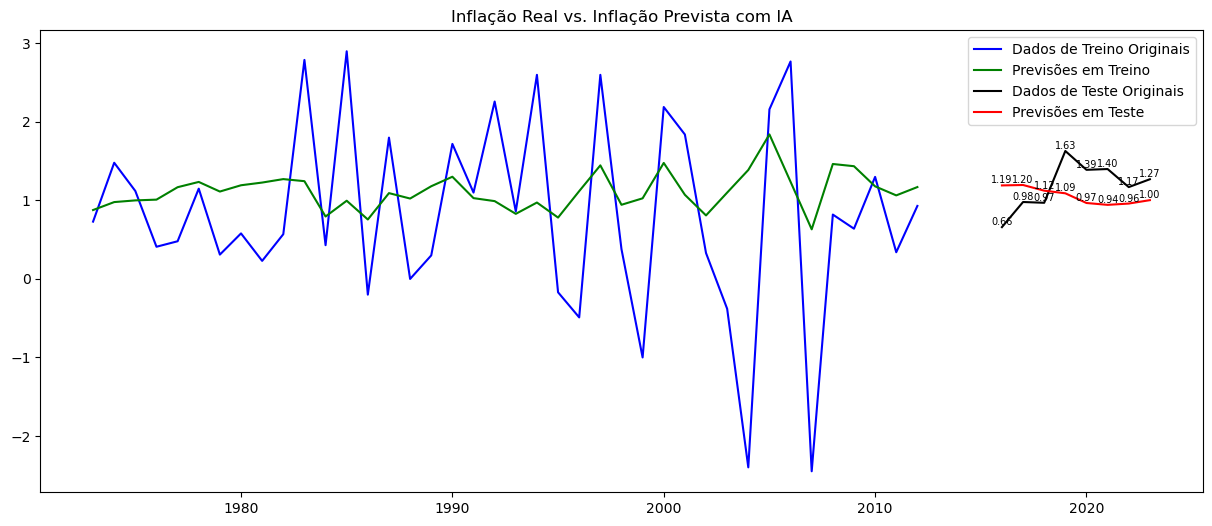

In [22]:
# Plotar os resultados
plt.figure(figsize = (15,6))

plt.plot(original_train_data_index, y_treino_rescaled[0], label = "Dados de Treino Originais", color = "blue")

plt.plot(predicted_train_data_index, previsao_treino[:, 0], label = "Previsões em Treino", color = "green")

plt.plot(original_test_data_index, y_teste_rescaled[0], label = "Dados de Teste Originais", color = "black")

for i, value in enumerate(y_teste_rescaled[0]):
    plt.annotate(f"{value:.2f}", (original_test_data_index.iloc[i], value), fontsize = 7, ha = 'center', va = 'bottom')

plt.plot(predicted_test_data_index, previsao_teste[:, 0], label = "Previsões em Teste", color = "red")

for i, value in enumerate(previsao_teste[:, 0]):
    plt.annotate(f"{value:.2f}", (predicted_test_data_index.iloc[i], value), fontsize = 7, ha = 'center', va = 'bottom')

plt.title("Inflação Real vs. Inflação Prevista com IA")
plt.legend()
plt.show()

In [23]:
# Previsões com o Modelo

# Usamos as últimas 3 entradas da série original de teste para fazer a próxima previsão
last_data = dados_teste_norm[-look_back:]
last_data = np.reshape(last_data, (1, look_back, 1))

In [25]:
# Lista
lista_previsoes = []

# Loop de Previsão para prever 2 anos (2024 e 2025)
for _ in range(2):  

    # Previsão com o modelo (usamos os dados normalizados)
    prediction = modelo.predict(last_data)

    # Adiciona a previsão à lista de previsões
    lista_previsoes.append(prediction[0, 0])

    # Atualiza os dados para incluir a nova previsão e remover o valor mais antigo
    last_data = np.roll(last_data, shift = -1)
    last_data[0, look_back - 1, 0] = prediction

# Transformar de volta para a escala original
lista_previsoes_rescaled = scaler.inverse_transform(np.array(lista_previsoes).reshape(-1, 1))

print(f"\nPrevisão da Inflação Para 2024: {lista_previsoes_rescaled[0, 0]:.2f}")
print(f"Previsão da Inflação Para 2025: {lista_previsoes_rescaled[1, 0]:.2f}")

print("\nLab Concluído. Obrigado!")

1/1 [==============================] - 0s 11ms/step

Previsão da Inflação Para 2024: 1.07
Previsão da Inflação Para 2025: 1.06

Lab Concluído. Obrigado!


/tmp/ipykernel_16897/398429856.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, look_back - 1, 0] = prediction
